Nama Anggota :
- Layli Rosalina (221011005)
- Muhammad Ahyawara (221011006)
- Ainun Fatwa (221011012)
- Firman Saputra (221011082)

In [ ]:
!pip install bahasa


In [ ]:
import pandas as pd
import numpy as np
import bahasa
import re
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Mengunduh resource yang diperlukan
import nltk
nltk.download('punkt')      # Untuk tokenisasi
nltk.download('stopwords')  # Untuk stopwords Bahasa Indonesia

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# 1. Load dataset
df = pd.read_excel('dataset.xlsx')
df.head(10)

,NO,NAMA_PENGGUNA,COMMENT,SENTIMEN
0,1,@danofficial2452,Kalau anda pintar menilai.... nilai secara glo...,Negatif
1,2,@indriSaman,Pantas menang elrumi.. lebih cerdik Elrumi,Positif
2,3,@smsun1030,Jefri hanya nganalin pukulan 1 2 tapi Elrumi k...,Positif
3,4,@user-cv7qm7ld8m,Heleeeehhhh jeprii ninju angin doank..wuuzz wu...,Negatif
4,5,@user-xc9xj4ki2y,El rumi cowok lemah...cuma menang gaya sama ba...,Negatif
5,6,@mtaqiyuddin4910,Hahah penilain konyol,Negatif
6,7,@semutireng8332,Jefri power dan pukulan good tapi jarang in da...,Negatif
7,8,@user-xo4rb2lh6x,Kocak 😅😅😅😅,Netral
8,9,@bayuanggara7213,Sebenarnya Jefri Bagus Powernya Dan Staminanya...,Netral
9,10,@ardiansyah-3268,Babak terakhir sama2 letoy seharusnya draw,Negatif


In [ ]:
# Fungsi untuk membersihkan teks
def clean_text(text):
    if not isinstance(text, str):
        return ''  # Mengembalikan string kosong jika input bukan string

    # Menghapus HTML tags
    text = re.sub(r'<.*?>', '', text)

    # Menghapus URL
    text = re.sub(r'http[s]?://\S+', '', text)

    # Menghapus karakter khusus dan angka (kecuali huruf)
    text = re.sub(r'[^A-Za-z\s]', '', text)

    return text


# Terapkan clean_text pada kolom 'comment'
df['cleaned_comment'] = df['COMMENT'].apply(clean_text)

# Tampilkan 10 baris pertama dari kolom 'cleaned_comment'
print("1. Setelah Clean Text:\n", df['cleaned_comment'].head(10), "\n")

1. Setelah Clean Text:
 0    Kalau anda pintar menilai nilai secara global ...
1             Pantas menang elrumi lebih cerdik Elrumi
2    Jefri hanya nganalin pukulan   tapi Elrumi kom...
3    Heleeeehhhh jeprii ninju angin doankwuuzz wuuzzz 
4    El rumi cowok lemahcuma menang gaya sama bacot...
5                                Hahah penilain konyol
6    Jefri power dan pukulan good tapi jarang in da...
7                                               Kocak 
8    Sebenarnya Jefri Bagus Powernya Dan Staminanya...
9            Babak terakhir sama letoy seharusnya draw
Name: cleaned_comment, dtype: object 



In [ ]:
# Fungsi untuk menghapus stopwords
def remove_stopwords(text):
    if not isinstance(text, str):
        return ''  # Mengembalikan string kosong jika input bukan string

    stop_words = set(stopwords.words('indonesian'))  # Menggunakan stopwords bahasa Indonesia
    tokens = text.split()  # Memisahkan teks menjadi token (kata)
    tokens = [word for word in tokens if word.lower() not in stop_words]  # Menghapus stopwords
    return ' '.join(tokens)  # Menggabungkan kembali menjadi string

# Menangani NaN atau non-string values dengan mengganti mereka dengan string kosong
df['COMMENT'] = df['COMMENT'].fillna('')  # Mengganti NaN dengan string kosong

# Terapkan remove_stopwords pada kolom 'COMMENT'
df['without_stopwords'] = df['cleaned_comment'].apply(remove_stopwords)

# Tampilkan hasil setelah penghapusan stopwords
print("2. Setelah Remove Stopwords:")
print(df['without_stopwords'].head(10), "\n")

2. Setelah Remove Stopwords:
0    pintar menilai nilai global pemenang nya El Ru...
1                          menang elrumi cerdik Elrumi
2    Jefri nganalin pukulan Elrumi kombinasi pukula...
3     Heleeeehhhh jeprii ninju angin doankwuuzz wuuzzz
4     El rumi cowok lemahcuma menang gaya bacotnya aja
5                                Hahah penilain konyol
6    Jefri power pukulan good jarang in buang tenag...
7                                                Kocak
8    Jefri Bagus Powernya Staminanya Tahan Keraguan...
9                                     Babak letoy draw
Name: without_stopwords, dtype: object 



In [ ]:
def simple_tokenize(text):
    # Tokenisasi dengan split berdasarkan spasi (hanya sebagai alternatif)
    if not isinstance(text, str):
        return []  # Kembalikan list kosong jika input bukan string
    return text.split()  # Tokenisasi berdasarkan spasi

# Terapkan tokenisasi sederhana pada kolom 'without_stopwords'
df['tokenized'] = df['without_stopwords'].apply(simple_tokenize)

# Tampilkan hasil setelah tokenisasi
print("3. Setelah Tokenisasi:")
print(df[["tokenized"]].head(10), "\n")


3. Setelah Tokenisasi:
                                           tokenized
0  [pintar, menilai, nilai, global, pemenang, nya...
1                   [menang, elrumi, cerdik, Elrumi]
2  [Jefri, nganalin, pukulan, Elrumi, kombinasi, ...
3  [Heleeeehhhh, jeprii, ninju, angin, doankwuuzz...
4  [El, rumi, cowok, lemahcuma, menang, gaya, bac...
5                          [Hahah, penilain, konyol]
6  [Jefri, power, pukulan, good, jarang, in, buan...
7                                            [Kocak]
8  [Jefri, Bagus, Powernya, Staminanya, Tahan, Ke...
9                               [Babak, letoy, draw] 



In [ ]:
def manual_stem(text):
    if not isinstance(text, str):
        return ''

    # Daftar awalan dan akhiran yang sering digunakan dalam Bahasa Indonesia karena kami tidak bisa menggunakan library sastrawi sehingga kami mengimput manual
    suffixes = ['kan', 'an', 'i', 'lah', 'kah', 'ku', 'mu', 'nya', 'tah', 'ti']
    prefixes = ['di', 'ke', 'se', 'ber', 'per', 'me', 'mem', 'men', 'meng', 'ter']

    # Tokenisasi kalimat menjadi kata-kata
    words = text.split()

    # Fungsi untuk menghapus akhiran yang valid
    def remove_suffix(word):
        for suffix in suffixes:
            # Memastikan bahwa penghapusan sufiks bukan menghapus kata yang sudah valid
            if word.endswith(suffix):
                stemmed_word = word[:-len(suffix)]
                # Pastikan kata setelah penghapusan sufiks tetap memiliki makna
                if stemmed_word in word_list:  # Periksa apakah kata yang tersisa valid
                    return stemmed_word
        return word

    # Fungsi untuk menghapus awalan yang valid
    def remove_prefix(word):
        for prefix in prefixes:
            # Memastikan bahwa penghapusan awalan bukan menghapus kata yang sudah valid
            if word.startswith(prefix):
                stemmed_word = word[len(prefix):]
                # Pastikan kata setelah penghapusan prefix tetap memiliki makna
                if stemmed_word in word_list:  # Periksa apakah kata yang tersisa valid
                    return stemmed_word
        return word

    # Daftar kata-kata valid (dari kamus bahasa Indonesia atau dataset)
    word_list = set(["kerja","harus", "nilai", "makan", "berlari", "membaca", "bermain", "masak", "lari", "baca", "main", "masak", "pintar", "besar", "indah", "bagus", "suka", "duduk"])

    # Terapkan remove_prefix dan remove_suffix pada setiap kata
    stemmed_words = [remove_suffix(remove_prefix(word)) for word in words]

    # Gabungkan kembali kata-kata yang telah distem
    return ' '.join(stemmed_words)


# Terapkan stemming manual pada kolom 'without_stopwords'
df['manual_stemmed'] = df['without_stopwords'].apply(manual_stem)

# Tampilkan hasil setelah stemming manual
print("5. Setelah Stemming Manual:")
print(df[['manual_stemmed']].head(10), "\n")


5. Setelah Stemming Manual:
                                      manual_stemmed
0  pintar nilai nilai global pemenang nya El Rumi...
1                        menang elrumi cerdik Elrumi
2  Jefri nganalin pukulan Elrumi kombinasi pukula...
3   Heleeeehhhh jeprii ninju angin doankwuuzz wuuzzz
4   El rumi cowok lemahcuma menang gaya bacotnya aja
5                              Hahah penilain konyol
6  Jefri power pukulan good jarang in buang tenag...
7                                              Kocak
8  Jefri Bagus Powernya Staminanya Tahan Keraguan...
9                                   Babak letoy draw 



In [ ]:
print(df.columns)

Index(['NO', 'NAMA_PENGGUNA', 'COMMENT', 'SENTIMEN', 'cleaned_comment',
       'without_stopwords', 'tokenized', 'manual_stemmed'],
      dtype='object')


In [ ]:
# 2. Tokenisasi dan padding
max_words = 10000   # Maksimal jumlah kata unik yang digunakan
max_len = 50        # Panjang maksimum untuk setiap input sequence

# Tokenizer untuk mengubah teks menjadi angka
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df['manual_stemmed'])  # Menggunakan kolom 'manual_stemmed' setelah dilakukan stemming
X = tokenizer.texts_to_sequences(df['manual_stemmed'])

# Padding untuk memastikan panjang sequence sama
X_pad = pad_sequences(X, maxlen=max_len)

# Mengganti NaN pada kolom 'SENTIMEN' dengan kelas 1 (Netral)
df['SENTIMEN'] = df['SENTIMEN'].fillna('Netral')

# Mapping label sentimen ke dalam format angka
sentimen_mapping = {'Negatif': 0, 'Netral': 1, 'Positif': 2}
df['sentimen_label'] = df['SENTIMEN'].map(sentimen_mapping)

# Pastikan tidak ada NaN dalam kolom sentimen_label
print("Jumlah NaN dalam sentimen_label:", np.sum(df['sentimen_label'].isna()))


# 3. Menyusun data label
y = np.array(df['sentimen_label'])  # Menggunakan kolom 'sentimen_label' sebagai label

# 4. Split data menjadi training dan testing (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.2, random_state=42)

# Tampilkan ukuran data training dan testing untuk memastikan
print(f'Ukuran data training (X_train, y_train): {X_train.shape}, {y_train.shape}')
print(f'Ukuran data testing (X_test, y_test): {X_test.shape}, {y_test.shape}')


Jumlah NaN dalam sentimen_label: 0
Ukuran data training (X_train, y_train): (640, 50), (640,)
Ukuran data testing (X_test, y_test): (160, 50), (160,)


In [ ]:
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.model_selection import train_test_split

# 1. Split data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.2, random_state=42)

# 2. Merapkan SMOTE untuk menyeimbangkan kelas pada data training
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# 3. Merapkan RandomOverSampler pada data yang sudah di-resample oleh SMOTE
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train_smote, y_train_smote)

# 4. Menampilkan ukuran data sebelum dan setelah SMOTE + RandomOverSampler
print(f'Ukuran data training sebelum SMOTE: {X_train.shape[0]} samples')
print(f'Ukuran data training setelah SMOTE: {X_train_smote.shape[0]} samples')
print(f'Ukuran data training setelah SMOTE + RandomOverSampler: {X_train_resampled.shape[0]} samples')

# 5. Menampilkan ukuran data testing (tidak terpengaruh oleh SMOTE dan RandomOverSampler)
print(f'Ukuran data testing: {X_test.shape[0]} samples')



Ukuran data training sebelum SMOTE: 640 samples
Ukuran data training setelah SMOTE: 936 samples
Ukuran data training setelah SMOTE + RandomOverSampler: 936 samples
Ukuran data testing: 160 samples


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warn

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report

# 1. Membangun Model LSTM untuk Klasifikasi Multi-Kelas dengan Bidirectional LSTM dan Regularisasi
model = Sequential()

# Layer embedding untuk representasi kata-kata
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))

# Layer Bidirectional LSTM untuk menangkap dependensi lebih kompleks
model.add(Bidirectional(LSTM(128, return_sequences=False)))  # 128 units di LSTM
model.add(Dropout(0.5))  # Dropout untuk regularisasi

# Layer Dense untuk output (3 neuron untuk prediksi multi-class sentiment)
model.add(Dense(3, activation='softmax'))  # Softmax untuk multi-class

# 2. Compile model
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# 3. Mengonversi label target ke dalam format one-hot encoding
y_train_one_hot = to_categorical(y_train_resampled, num_classes=3)
y_test_one_hot = to_categorical(y_test, num_classes=3)

# 4. Menambahkan Callback untuk EarlyStopping dan ReduceLROnPlateau
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=1e-6)

# 5. Melatih model
model.fit(X_train_resampled, y_train_one_hot, epochs=100, batch_size=42,
          validation_data=(X_test, y_test_one_hot),
          callbacks=[early_stopping, reduce_lr])

# 6. Evaluasi model
loss, accuracy = model.evaluate(X_test, y_test_one_hot)

# Prediksi dengan model
y_pred = model.predict(X_test)

y_pred_labels = y_pred.argmax(axis=1)

y_test_labels = y_test

print(classification_report(y_test_labels, y_pred_labels))

# Print hasil loss dan accuracy
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


23/23 ━━━━━━━━━━━━━━━━━━━━ 11s 222ms/step - accuracy: 0.3271 - loss: 1.1027 - val_accuracy: 0.3938 - val_loss: 1.0997 - learning_rate: 0.0010
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 267ms/step - accuracy: 0.3947 - loss: 1.0855 - val_accuracy: 0.4938 - val_loss: 1.0517 - learning_rate: 0.0010
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 9s 199ms/step - accuracy: 0.5711 - loss: 1.0319 - val_accuracy: 0.5562 - val_loss: 0.9855 - learning_rate: 0.0010
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 323ms/step - accuracy: 0.7075 - loss: 0.8066 - val_accuracy: 0.6187 - val_loss: 0.9600 - learning_rate: 0.0010
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 202ms/step - accuracy: 0.7828 - loss: 0.5902 - val_accuracy: 0.5562 - val_loss: 1.0462 - learning_rate: 0.0010
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 310ms/step - accuracy: 0.8606 - loss: 0.3973 - val_accuracy: 0.4625 - val_loss: 1.2321 - learning_rate: 0.0010
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 201ms/step - accuracy: 0.9113 - loss: 0.2968 - val_

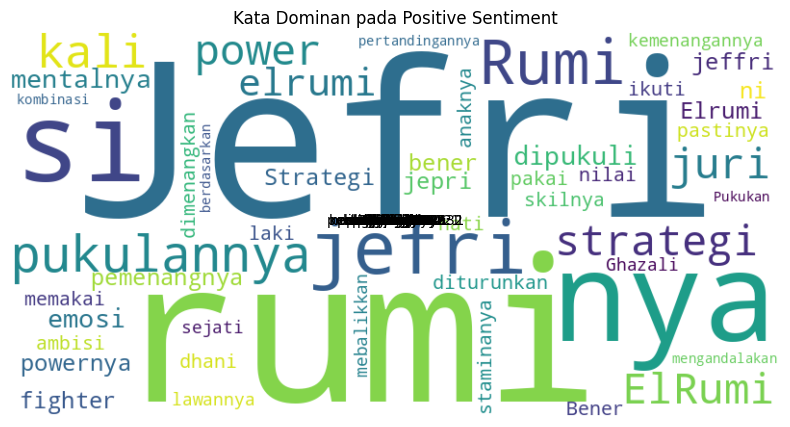

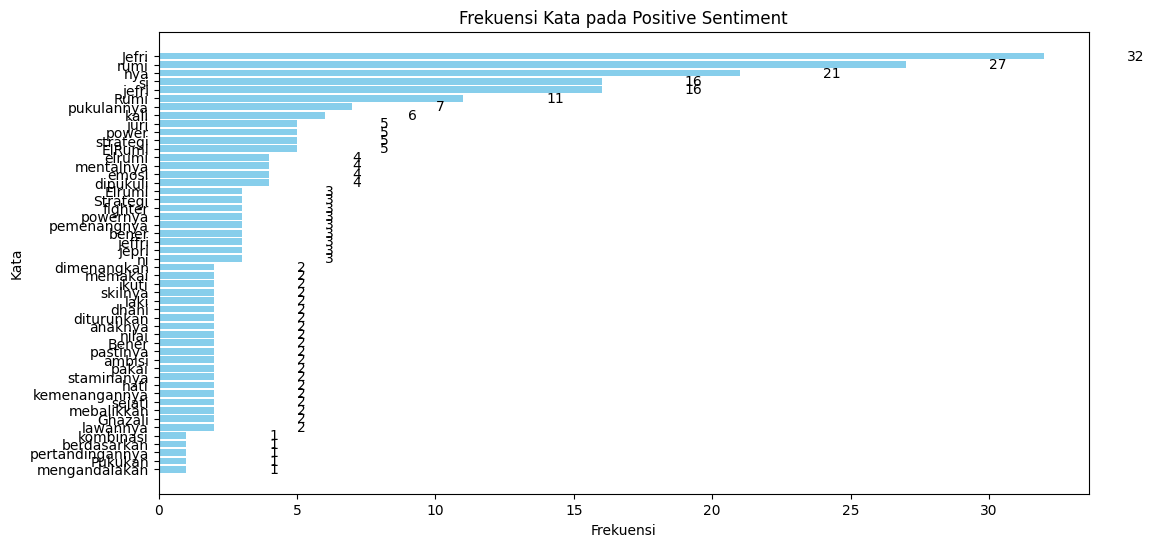

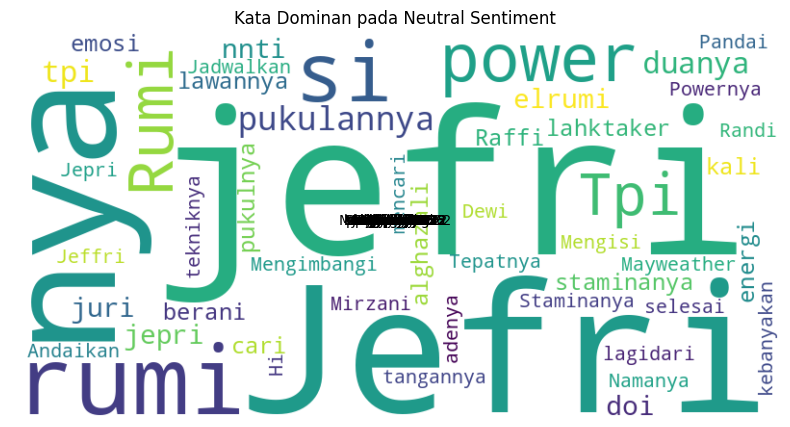

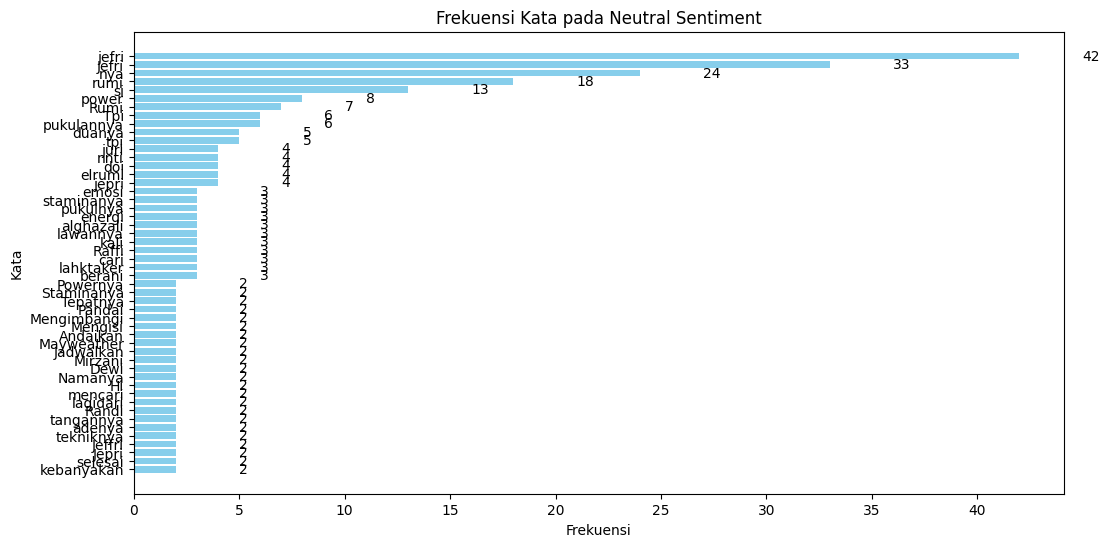

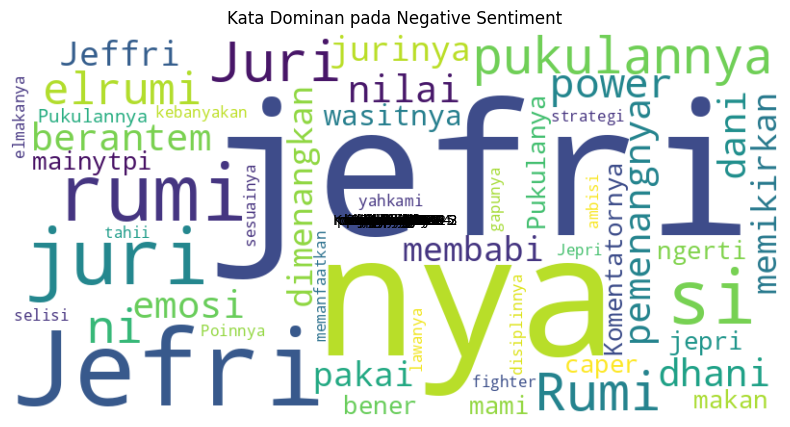

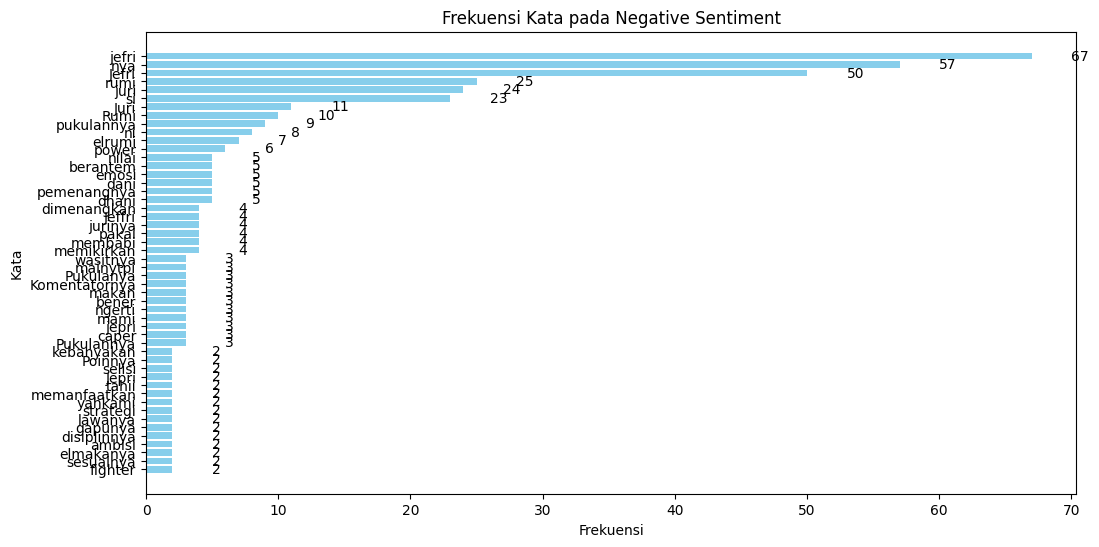

In [357]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

# Fungsi untuk mendeteksi kata kerja berdasarkan sufiks yang umum dalam bahasa Indonesia
def extract_verbs_based_on_suffix(texts):
    verbs = []
    verb_suffixes = ['kan', 'i', 'nya', 'er', 'em']  # Sufiks umum untuk kata kerja

    for text in texts:
        words = text.split()  # Tokenisasi sederhana berdasarkan spasi
        for word in words:
            # Cek apakah kata berakhiran dengan sufiks yang umum untuk kata kerja
            if any(word.endswith(suffix) for suffix in verb_suffixes):
                verbs.append(word)

    return verbs

# Ekstraksi kata kerja dari teks untuk setiap kategori sentimen
positive_verbs = extract_verbs_based_on_suffix(df_positive['manual_stemmed'])
neutral_verbs = extract_verbs_based_on_suffix(df_neutral['manual_stemmed'])
negative_verbs = extract_verbs_based_on_suffix(df_negative['manual_stemmed'])

# Menyusun frekuensi kata kerja
def get_most_common_words_from_verbs(verbs, max_words=50):
    verb_counts = Counter(verbs)
    common_verbs = verb_counts.most_common(max_words)
    return common_verbs

# Mendapatkan kata kerja dominan untuk setiap kategori
positive_verbs_common = get_most_common_words_from_verbs(positive_verbs)
neutral_verbs_common = get_most_common_words_from_verbs(neutral_verbs)
negative_verbs_common = get_most_common_words_from_verbs(negative_verbs)

# Fungsi untuk menghasilkan dan menampilkan WordCloud berdasarkan kata dominan
def generate_wordcloud_from_verbs(common_verbs, sentiment_category):
    # Membuat frekuensi kata (word frequency) dari kata kerja dominan
    word_freq = dict(common_verbs)  # Mengonversi list of tuple menjadi dictionary

    # Generate WordCloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

    # Menampilkan WordCloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Kata Dominan pada {sentiment_category} Sentiment")

    # Menambahkan frekuensi kata ke dalam WordCloud
    for word, freq in common_verbs:
        plt.text(x=wordcloud.width / 2, y=wordcloud.height / 2,
                 s=f"{word}: {freq}", color='black', fontsize=10, ha='center')

    plt.show()

    # Menampilkan Bar Chart untuk Frekuensi Kata
    words, freqs = zip(*common_verbs)  # Memisahkan kata dan frekuensinya
    plt.figure(figsize=(12, 6))
    bars = plt.barh(words, freqs, color='skyblue')
    plt.xlabel('Frekuensi')
    plt.ylabel('Kata')
    plt.title(f'Frekuensi Kata pada {sentiment_category} Sentiment')
    plt.gca().invert_yaxis()  # Membalik urutan sumbu y agar kata yang paling sering muncul di atas

    # Menambahkan angka frekuensi di atas bar chart
    for bar in bars:
        plt.text(bar.get_width() + 3, bar.get_y() + bar.get_height()/2,
                 str(int(bar.get_width())), va='center', ha='left', fontsize=10, color='black')

    plt.show()

# Menampilkan WordCloud dan Bar Chart untuk masing-masing kategori sentimen
generate_wordcloud_from_verbs(positive_verbs_common, 'Positive')
generate_wordcloud_from_verbs(neutral_verbs_common, 'Neutral')
generate_wordcloud_from_verbs(negative_verbs_common, 'Negative')
